In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE,SMOTENC
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import optuna
from collections import Counter
import time
import warnings
import gc


import datetime

pd.set_option('display.max_columns', None)
# plt.style.use(style = 'seaborn')

In [3]:
    
df=pd.read_parquet('cleaned_births_14_15.parquet')

xtrain, xtest, ytrain, ytest = train_test_split\
(df.drop(['survival'],axis=1), df.survival, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)

xbal, ybal = rus.fit_resample(xtrain, ytrain)

In [5]:
del df
from helper import wrapper, feature_importances, performance_result, confusion_matrix_plot

In [6]:

df_xbal=pd.concat([ybal,xbal],axis=1) # This Dataframe contains training data with the target and all other features 





In [7]:
Column_Transformer=wrapper(None).col_transform 
# using the wrapper function from the helper module to easily produce a column transformer with the appropriate encoding



In [60]:

# using sklearn.metrics.make_scorer it is possible to define an objective function to maximize or minimize instead 
#of using the standard scoring method for the classifier one is using.

def fp_rate(y,y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    return(fp/(fp+tn))
false_positive_rate=make_scorer(fp_rate)




### GradientBoostingClassifier, Maximizing precision.
Below is a demonstration of the process to optimize hyperparameters for a GradientBoostingClassifier using precision as the metric to be maximized. A sample of just 1000 rows of the balanced training data is used for the repeated crossvalidation as the processing power of the computer this notebook is being written on is limited. This repo contains a notebook in which a more rigorus process is employed.  

In [82]:
subsample=df_xbal.sample(1000)
# a subset of 1000 rows is selected primarily for demonstrational purposes
subx,suby=subsample.drop(columns=['survival']),subsample['survival']
def objective(trial):
    
    x, y = Column_Transformer.fit_transform(subx),suby

    
    
    params_gbc={'n_estimators' : trial.suggest_int("n_estimators", 250, 650),
    'learning_rate' : trial.suggest_float("learning_rate", 0.05, 0.25),
    'max_features' : trial.suggest_int("max_features",32,300),
    'min_samples_split' : trial.suggest_float("min_samples_split", 0.1, 1.0),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,4),
    'max_depth' : trial.suggest_int('max_depth',2,10)}
    classifier_obj = GradientBoostingClassifier(**params_gbc)

    score = cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=5,scoring=make_scorer(precision_score))
    mean_metric = score.mean()
    return mean_metric

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2023-03-18 19:58:01,321] A new study created in memory with name: no-name-0577479a-0643-4421-8461-fce7f72b0793
[I 2023-03-18 19:58:04,991] Trial 0 finished with value: 0.7872302293467343 and parameters: {'n_estimators': 284, 'learning_rate': 0.12575651156836498, 'max_features': 284, 'min_samples_split': 0.15652072899911496, 'min_samples_leaf': 1, 'max_depth': 5}. Best is trial 0 with value: 0.7872302293467343.
[I 2023-03-18 19:58:06,361] Trial 1 finished with value: 0.7802318541451668 and parameters: {'n_estimators': 343, 'learning_rate': 0.2236908221986686, 'max_features': 160, 'min_samples_split': 0.3452378797496753, 'min_samples_leaf': 4, 'max_depth': 2}. Best is trial 0 with value: 0.7872302293467343.
[I 2023-03-18 19:58:06,702] Trial 2 finished with value: 0.7795856203332838 and parameters: {'n_estimators': 318, 'learning_rate': 0.1779640783518805, 'max_features': 77, 'min_samples_split': 0.9956456988660767, 'min_samples_leaf': 2, 'max_depth': 5}. Best is trial 0 with value: 0.

[I 2023-03-18 19:58:53,444] Trial 26 finished with value: 0.7867952132732897 and parameters: {'n_estimators': 609, 'learning_rate': 0.13325552031352814, 'max_features': 199, 'min_samples_split': 0.3325855887184035, 'min_samples_leaf': 2, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 19:58:55,604] Trial 27 finished with value: 0.7830041075536125 and parameters: {'n_estimators': 618, 'learning_rate': 0.1605551569661742, 'max_features': 173, 'min_samples_split': 0.16120498672688932, 'min_samples_leaf': 1, 'max_depth': 4}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 19:58:59,173] Trial 28 finished with value: 0.7865922556581189 and parameters: {'n_estimators': 483, 'learning_rate': 0.07547203675010568, 'max_features': 270, 'min_samples_split': 0.10017140027289466, 'min_samples_leaf': 3, 'max_depth': 7}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 19:59:01,285] Trial 29 finished with value: 0.786690806858874 and paramet

[I 2023-03-18 19:59:46,507] Trial 52 finished with value: 0.7909440788883206 and parameters: {'n_estimators': 489, 'learning_rate': 0.10202164011868331, 'max_features': 276, 'min_samples_split': 0.11077201988340232, 'min_samples_leaf': 2, 'max_depth': 5}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 19:59:48,961] Trial 53 finished with value: 0.7820654808424173 and parameters: {'n_estimators': 535, 'learning_rate': 0.08381708040005545, 'max_features': 260, 'min_samples_split': 0.18599259030443577, 'min_samples_leaf': 3, 'max_depth': 4}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 19:59:50,236] Trial 54 finished with value: 0.7845403884304385 and parameters: {'n_estimators': 506, 'learning_rate': 0.07237939107230586, 'max_features': 226, 'min_samples_split': 0.234953600991972, 'min_samples_leaf': 2, 'max_depth': 2}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 19:59:51,928] Trial 55 finished with value: 0.7870434130309033 and parame

[I 2023-03-18 20:00:41,785] Trial 78 finished with value: 0.7870631507898589 and parameters: {'n_estimators': 461, 'learning_rate': 0.11216550945025286, 'max_features': 240, 'min_samples_split': 0.2399737026180035, 'min_samples_leaf': 1, 'max_depth': 4}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:00:43,109] Trial 79 finished with value: 0.788218981519216 and parameters: {'n_estimators': 302, 'learning_rate': 0.11008952866859775, 'max_features': 277, 'min_samples_split': 0.32844476676679474, 'min_samples_leaf': 1, 'max_depth': 4}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:00:44,440] Trial 80 finished with value: 0.7907487436755795 and parameters: {'n_estimators': 376, 'learning_rate': 0.1062006242570448, 'max_features': 218, 'min_samples_split': 0.15327884582546572, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:00:45,784] Trial 81 finished with value: 0.7873335530899306 and paramet

[I 2023-03-18 20:01:16,423] Trial 104 finished with value: 0.7872048243102732 and parameters: {'n_estimators': 354, 'learning_rate': 0.10869461330251844, 'max_features': 292, 'min_samples_split': 0.1794185991281653, 'min_samples_leaf': 3, 'max_depth': 2}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:01:17,820] Trial 105 finished with value: 0.7876478124519453 and parameters: {'n_estimators': 349, 'learning_rate': 0.10301055650159222, 'max_features': 246, 'min_samples_split': 0.10143096763051668, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:01:19,309] Trial 106 finished with value: 0.7969542070526903 and parameters: {'n_estimators': 358, 'learning_rate': 0.08487675099998462, 'max_features': 234, 'min_samples_split': 0.14535468321428416, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:01:20,770] Trial 107 finished with value: 0.7924623778007192 and p

[I 2023-03-18 20:01:52,050] Trial 130 finished with value: 0.7872839329247097 and parameters: {'n_estimators': 397, 'learning_rate': 0.10224243959166492, 'max_features': 258, 'min_samples_split': 0.2063870980586761, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:01:53,408] Trial 131 finished with value: 0.790781173920525 and parameters: {'n_estimators': 346, 'learning_rate': 0.09604072564703689, 'max_features': 251, 'min_samples_split': 0.1438757285530049, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:01:54,817] Trial 132 finished with value: 0.7889328413053784 and parameters: {'n_estimators': 355, 'learning_rate': 0.09918108808003223, 'max_features': 274, 'min_samples_split': 0.12837536900579985, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:01:56,278] Trial 133 finished with value: 0.7841098936557753 and par

[I 2023-03-18 20:02:22,504] Trial 156 finished with value: 0.7875613553113553 and parameters: {'n_estimators': 261, 'learning_rate': 0.10824702287859497, 'max_features': 257, 'min_samples_split': 0.11600527752098208, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:02:23,412] Trial 157 finished with value: 0.7808495262264575 and parameters: {'n_estimators': 327, 'learning_rate': 0.09428670543194152, 'max_features': 226, 'min_samples_split': 0.2030745639266305, 'min_samples_leaf': 1, 'max_depth': 2}. Best is trial 14 with value: 0.7984160184387041.
[I 2023-03-18 20:02:25,032] Trial 158 finished with value: 0.7988965476889242 and parameters: {'n_estimators': 404, 'learning_rate': 0.07387994236704896, 'max_features': 263, 'min_samples_split': 0.1000033479945973, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 158 with value: 0.7988965476889242.
[I 2023-03-18 20:02:26,604] Trial 159 finished with value: 0.7960259077492087 and p

[I 2023-03-18 20:03:05,707] Trial 182 finished with value: 0.7960071301247771 and parameters: {'n_estimators': 415, 'learning_rate': 0.07879195903913663, 'max_features': 253, 'min_samples_split': 0.14050991739522956, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 161 with value: 0.8008298990502999.
[I 2023-03-18 20:03:07,508] Trial 183 finished with value: 0.7962103342410514 and parameters: {'n_estimators': 433, 'learning_rate': 0.07902205017186545, 'max_features': 258, 'min_samples_split': 0.11702758035728376, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 161 with value: 0.8008298990502999.
[I 2023-03-18 20:03:09,353] Trial 184 finished with value: 0.793154589913361 and parameters: {'n_estimators': 438, 'learning_rate': 0.07981002301797491, 'max_features': 259, 'min_samples_split': 0.10059010048819814, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 161 with value: 0.8008298990502999.
[I 2023-03-18 20:03:11,202] Trial 185 finished with value: 0.7893072908185325 an

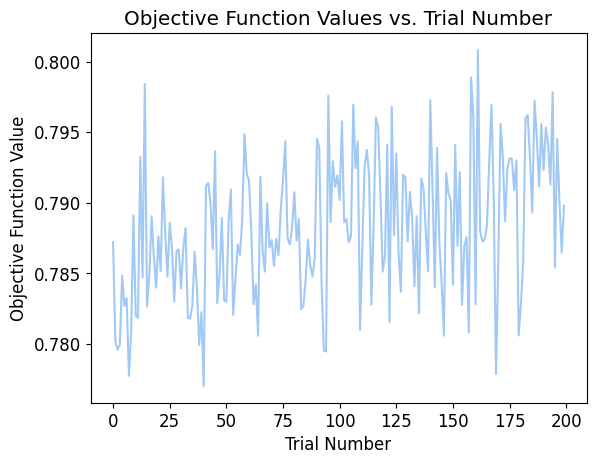

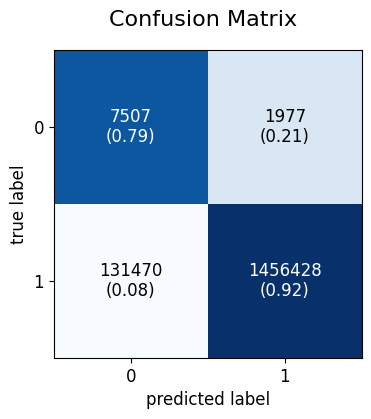

FP rate=FP/(FP+TN):  0.2085
Precision=TP/(TP+FP) :  0.9986
Recall=TP/(TP+FN) :  0.9172
AUC-PR:  0.9983
f1-score:  0.9562
roc_auc:  0.8544
Accuracy:  0.9165


 {'n_estimators': 425, 'learning_rate': 0.07522819555907034, 'max_features': 250, 'min_samples_split': 0.1415917469393102, 'min_samples_leaf': 1, 'max_depth': 3} 




In [83]:
trials_df = study.trials_dataframe()
# Plot the objective function values versus the trial number
sns.lineplot(trials_df, x='number',y='value')
#plt.plot(trials_df['number'], trials_df['value'], 'bo-')
plt.xlabel('Trial Number')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Values vs. Trial Number')
clf_tuned=wrapper(GradientBoostingClassifier(**study.best_params)).fit(xbal, ybal)
performance_result(ytest,clf_tuned.predict(xtest))

print('\n\n',study.best_params,'\n\n')

feature_importances(xgbc)
plt.show()


### XGBClassifier, Minimizing False Positive Rate.
Below is a very similar process however it makes use of a different hyperparameter dictionary and minimizes instead of maximizes the false positive rate instead of the precision score.

In [84]:
subsample=df_xbal.sample(1000)
subx,suby=subsample.drop(columns=['survival']),subsample['survival']
def objective(trial):
    
    x, y = Column_Transformer.fit_transform(subx),suby

    
    xgbc_params={'n_estimators' : trial.suggest_int("n_estimators", 200, 500),
    'learning_rate' : trial.suggest_float("learning_rate", 0.01, 0.25),
    'max_depth' : trial.suggest_int("max_depth", 1, 32),
                 'eta': trial.suggest_float("eta", 0.01, 0.5),
                 'max_delta_step': trial.suggest_int("max_delta_step", 0, 7),
                 'gamma' : trial.suggest_int("gamma", 0, 7),
                'objective' : trial.suggest_categorical('objective', ['binary:logistic','reg:squarederror']),
                 'reg_lambda' : trial.suggest_float('reg_lambda', 0,1)}
    classifier_obj = XGBClassifier(**xgbc_params)

    score = cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=5,scoring=false_positive_rate)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)


[I 2023-03-18 21:10:30,544] A new study created in memory with name: no-name-18bc9551-7d49-443d-aacb-18a3e06d8872
[I 2023-03-18 21:10:35,062] Trial 0 finished with value: 0.1992857142857143 and parameters: {'n_estimators': 411, 'learning_rate': 0.1988118839965125, 'max_depth': 23, 'eta': 0.4226681990488438, 'max_delta_step': 4, 'gamma': 1, 'objective': 'binary:logistic', 'reg_lambda': 0.6684958335551586}. Best is trial 0 with value: 0.1992857142857143.
[I 2023-03-18 21:10:37,209] Trial 1 finished with value: 0.2013003663003663 and parameters: {'n_estimators': 216, 'learning_rate': 0.15278779506716209, 'max_depth': 11, 'eta': 0.23986411171644298, 'max_delta_step': 0, 'gamma': 4, 'objective': 'reg:squarederror', 'reg_lambda': 0.8421955115200972}. Best is trial 0 with value: 0.1992857142857143.
[I 2023-03-18 21:10:39,313] Trial 2 finished with value: 0.21082417582417584 and parameters: {'n_estimators': 379, 'learning_rate': 0.039667747016185126, 'max_depth': 6, 'eta': 0.4797312923468703, 

[I 2023-03-18 21:11:22,293] Trial 23 finished with value: 0.2012271062271062 and parameters: {'n_estimators': 303, 'learning_rate': 0.08738216243597656, 'max_depth': 32, 'eta': 0.49902529637484183, 'max_delta_step': 2, 'gamma': 1, 'objective': 'binary:logistic', 'reg_lambda': 0.32923268347996815}. Best is trial 4 with value: 0.18972527472527476.
[I 2023-03-18 21:11:23,342] Trial 24 finished with value: 0.20886446886446883 and parameters: {'n_estimators': 235, 'learning_rate': 0.12150693303025589, 'max_depth': 28, 'eta': 0.37461116895568275, 'max_delta_step': 3, 'gamma': 0, 'objective': 'binary:logistic', 'reg_lambda': 0.21535806333005836}. Best is trial 4 with value: 0.18972527472527476.
[I 2023-03-18 21:11:25,618] Trial 25 finished with value: 0.2012087912087912 and parameters: {'n_estimators': 274, 'learning_rate': 0.07848100489896859, 'max_depth': 21, 'eta': 0.44369508647828604, 'max_delta_step': 6, 'gamma': 3, 'objective': 'binary:logistic', 'reg_lambda': 0.32579377081385713}. Best

[I 2023-03-18 21:12:18,076] Trial 46 finished with value: 0.19362637362637364 and parameters: {'n_estimators': 398, 'learning_rate': 0.022022221272141016, 'max_depth': 6, 'eta': 0.385842819363215, 'max_delta_step': 5, 'gamma': 2, 'objective': 'reg:squarederror', 'reg_lambda': 0.37105725540743373}. Best is trial 28 with value: 0.18785714285714286.
[I 2023-03-18 21:12:19,731] Trial 47 finished with value: 0.21844322344322348 and parameters: {'n_estimators': 424, 'learning_rate': 0.0678110626313726, 'max_depth': 18, 'eta': 0.40665905661935775, 'max_delta_step': 6, 'gamma': 0, 'objective': 'reg:squarederror', 'reg_lambda': 0.24467421166314157}. Best is trial 28 with value: 0.18785714285714286.
[I 2023-03-18 21:12:24,185] Trial 48 finished with value: 0.19553113553113555 and parameters: {'n_estimators': 364, 'learning_rate': 0.09119989169874655, 'max_depth': 13, 'eta': 0.43615861121449195, 'max_delta_step': 2, 'gamma': 2, 'objective': 'reg:squarederror', 'reg_lambda': 0.275988798498795}. Be

[I 2023-03-18 21:13:22,327] Trial 69 finished with value: 0.19739926739926741 and parameters: {'n_estimators': 397, 'learning_rate': 0.033103736132955724, 'max_depth': 15, 'eta': 0.4546118328253266, 'max_delta_step': 1, 'gamma': 2, 'objective': 'binary:logistic', 'reg_lambda': 0.19256915995695978}. Best is trial 28 with value: 0.18785714285714286.
[I 2023-03-18 21:13:25,182] Trial 70 finished with value: 0.19937728937728938 and parameters: {'n_estimators': 329, 'learning_rate': 0.06377286950017673, 'max_depth': 8, 'eta': 0.4222691900280698, 'max_delta_step': 6, 'gamma': 3, 'objective': 'reg:squarederror', 'reg_lambda': 0.2875304498213132}. Best is trial 28 with value: 0.18785714285714286.
[I 2023-03-18 21:13:28,255] Trial 71 finished with value: 0.19935897435897437 and parameters: {'n_estimators': 379, 'learning_rate': 0.02731605697838354, 'max_depth': 8, 'eta': 0.373662788464148, 'max_delta_step': 5, 'gamma': 2, 'objective': 'reg:squarederror', 'reg_lambda': 0.15764083556628428}. Best

[I 2023-03-18 21:14:32,699] Trial 92 finished with value: 0.19362637362637364 and parameters: {'n_estimators': 421, 'learning_rate': 0.020823627308903195, 'max_depth': 6, 'eta': 0.3822282176944697, 'max_delta_step': 5, 'gamma': 2, 'objective': 'reg:squarederror', 'reg_lambda': 0.36479409889297276}. Best is trial 28 with value: 0.18785714285714286.
[I 2023-03-18 21:14:33,766] Trial 93 finished with value: 0.2013003663003663 and parameters: {'n_estimators': 390, 'learning_rate': 0.013725522583546085, 'max_depth': 3, 'eta': 0.4181498195125544, 'max_delta_step': 6, 'gamma': 1, 'objective': 'reg:squarederror', 'reg_lambda': 0.2849353015576324}. Best is trial 28 with value: 0.18785714285714286.
[I 2023-03-18 21:14:35,810] Trial 94 finished with value: 0.2032234432234432 and parameters: {'n_estimators': 407, 'learning_rate': 0.03525196847871591, 'max_depth': 6, 'eta': 0.3970694800016406, 'max_delta_step': 5, 'gamma': 7, 'objective': 'reg:squarederror', 'reg_lambda': 0.3366388954327193}. Best 

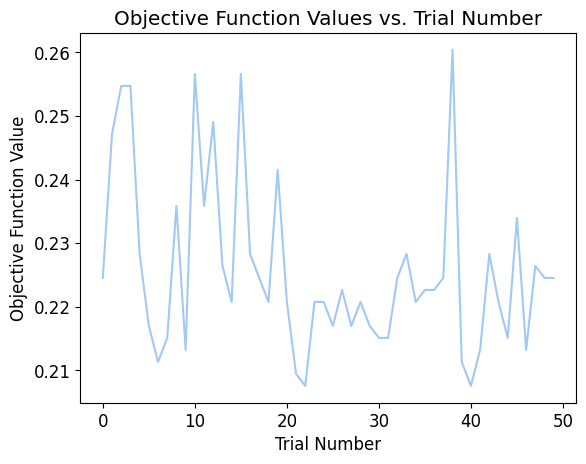

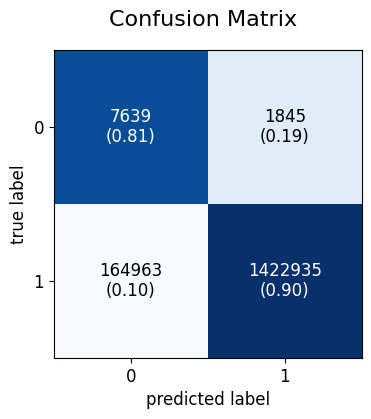

FP rate=FP/(FP+TN):  0.1945
Precision=TP/(TP+FP) :  0.9987
Recall=TP/(TP+FN) :  0.8961
AUC-PR:  0.9982
f1-score:  0.9446
roc_auc:  0.8508
Accuracy:  0.8956


 {'n_estimators': 266, 'learning_rate': 0.2175325006195344, 'max_depth': 27, 'eta': 0.19532160732978815, 'max_delta_step': 1, 'gamma': 4, 'objective': 'binary:logistic', 'reg_lambda': 0.15648825681061934} 




,importance,feature
0,0.108819,cat__ab_nicu_Y
1,0.071303,num__apgar5
2,0.048929,num__brthwgt
3,0.024045,cat__ab_nicu_N
4,0.022007,cat__ca_cchd_Y
...,...,...
280,0.0,cat__ca_hypo_0
281,0.0,cat__ab_nicu_1
282,0.0,cat__ca_gast_U
283,0.0,cat__mrace6_NA


In [81]:
trials_df = study.trials_dataframe()
# Plot the objective function values versus the trial number
sns.lineplot(trials_df, x='number',y='value')
#plt.plot(trials_df['number'], trials_df['value'], 'bo-')
plt.xlabel('Trial Number')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Values vs. Trial Number')

xgbc=wrapper(XGBClassifier(**study.best_params)).fit(xbal,ybal)
performance_result(ytest,xgbc.predict(xtest))

print('\n\n',study.best_params,'\n\n')

feature_importances(xgbc)

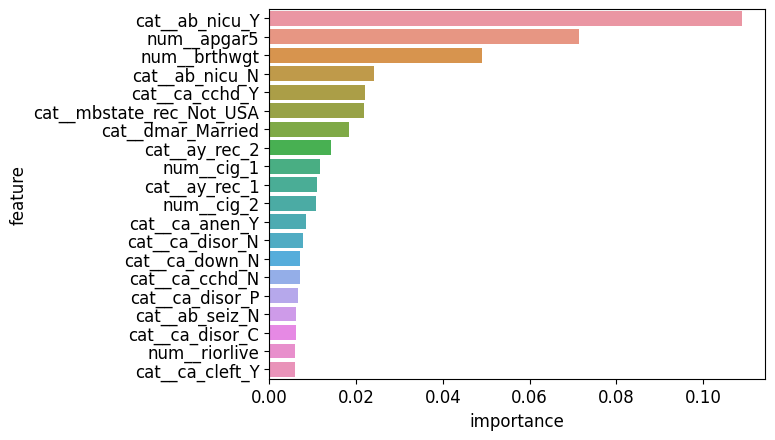

In [79]:
sns.set_palette("pastel")
sns.barplot(feature_importances(xgbc).head(20),y='feature',x='importance',orient='h')
plt.show()